In [21]:
#import libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dense , Conv2D , MaxPooling2D , Dropout,Flatten,Convolution2D
from time import perf_counter 
import os
sns.set()


In [3]:
batch_size = 100
img_height = 224
img_width = 224

## loading training set
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    seed=123,
    image_size= (img_height, img_width),
    batch_size=batch_size

)



Found 70295 files belonging to 38 classes.


In [4]:
## loading validation dataset
val_data =  tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    seed=123,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 17572 files belonging to 38 classes.


In [7]:

## loading testing set
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/test',
    seed=2,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 33 files belonging to 1 classes.


In [6]:
class_names = train_data.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

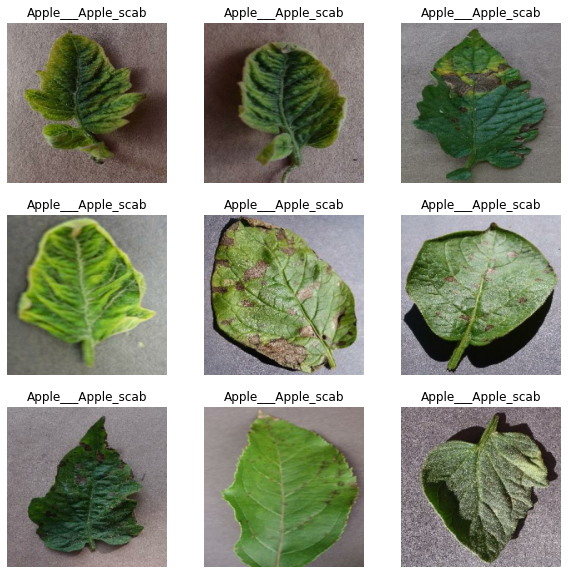

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in test_data.take(1):
    
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [16]:
## Defining Cnn

model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(38, activation= 'softmax')
])

In [17]:
#compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 54, 54, 64)       

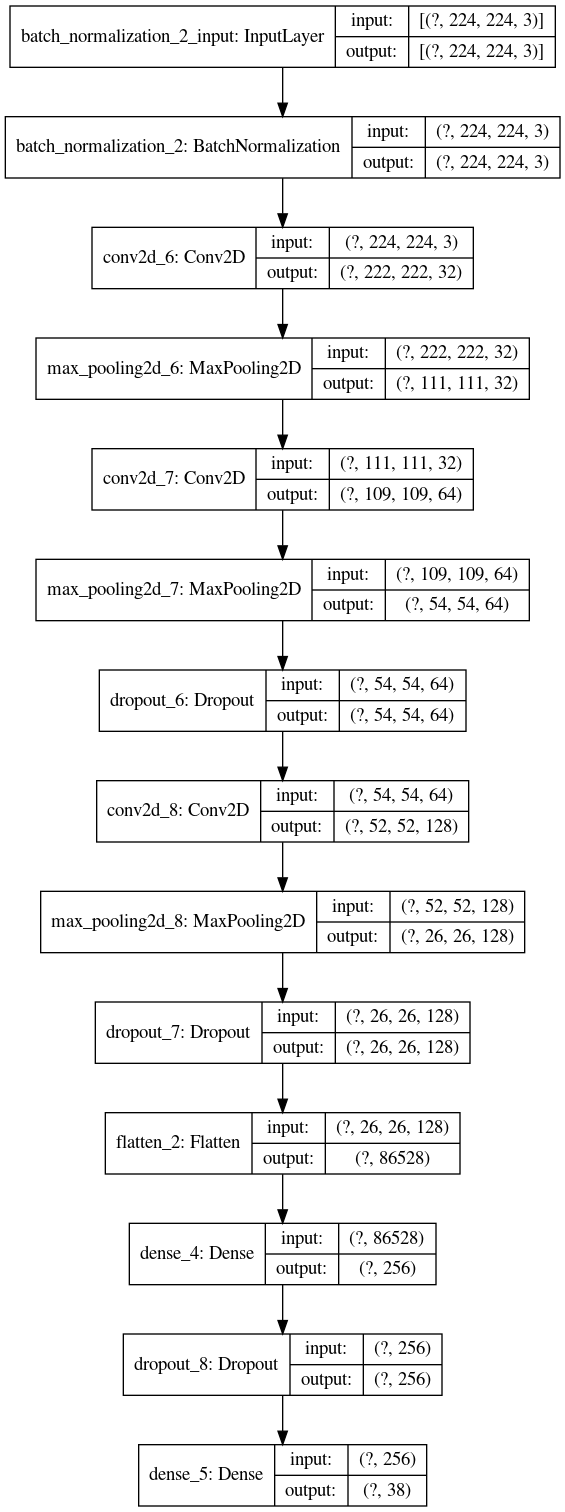

In [42]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
#to avoid overfitting
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [19]:
## fit model
history=model.fit(train_data,validation_data= val_data,epochs = 20,callbacks=[early])

Epoch 1/20
703/703 [==============================] - 773s 1s/step - loss: 1.5103 - accuracy: 0.5735 - val_loss: 0.5825 - val_accuracy: 0.8253
Epoch 2/20
703/703 [==============================] - 266s 378ms/step - loss: 0.5719 - accuracy: 0.8214 - val_loss: 0.3783 - val_accuracy: 0.8812
Epoch 3/20
703/703 [==============================] - 268s 381ms/step - loss: 0.3904 - accuracy: 0.8756 - val_loss: 0.2661 - val_accuracy: 0.9143
Epoch 4/20
703/703 [==============================] - 270s 385ms/step - loss: 0.2663 - accuracy: 0.9136 - val_loss: 0.2363 - val_accuracy: 0.9226
Epoch 5/20
703/703 [==============================] - 271s 386ms/step - loss: 0.1989 - accuracy: 0.9339 - val_loss: 0.2369 - val_accuracy: 0.9256
Epoch 6/20
703/703 [==============================] - 269s 382ms/step - loss: 0.1706 - accuracy: 0.9424 - val_loss: 0.2511 - val_accuracy: 0.9192
Epoch 7/20
703/703 [==============================] - 274s 390ms/step - loss: 0.1440 - accuracy: 0.9522 - val_loss: 0.2003 - va

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

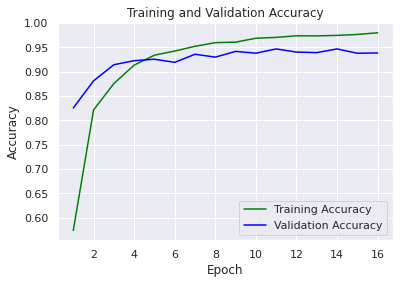

<Figure size 432x288 with 0 Axes>

In [26]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.show()

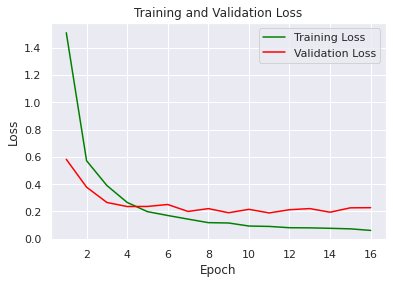

In [120]:
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='blue', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

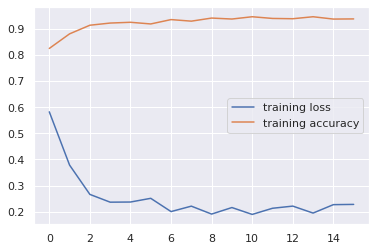

In [30]:
plt.plot(history.history['val_loss'], label = 'training loss')
plt.plot(history.history['val_accuracy'], label = 'training accuracy')
plt.legend()

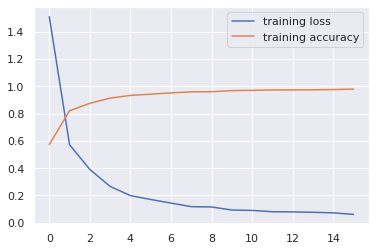

In [31]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.legend()

In [32]:
#evulate model
model.evaluate(val_data)

176/176 [==============================] - 45s 258ms/step - loss: 0.2278 - accuracy: 0.9385


[0.22780977189540863, 0.9384816884994507]

In [43]:
tf.saved_model.save(model,'model')

In [75]:
model.save('model2.h5')

In [88]:
#predict val data
y_pred = model.predict(val_data)
y_pred =  np.argmax(y_pred,axis=1)

print(y_pred)

[15 28  1 ... 15 16 19]
